In [23]:
import numpy as np
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, confusion_matrix, silhouette_samples
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Load dataset
texts = pd.read_csv('/kaggle/input/people-wiki-11/people_wiki.csv')['text']
texts.head()

0    digby morrell born 10 october 1979 is a former...
1    alfred j lewy aka sandy lewy graduated from un...
2    harpdog brown is a singer and harmonica player...
3    franz rottensteiner born in waidmannsfeld lowe...
4    henry krvits born 30 december 1974 in tallinn ...
Name: text, dtype: object

---
## Preprocess

In [25]:
cleaned_texts = []
for text in texts:
    text = re.sub(r'\W+', ' ', text.lower())
    tokens = text.split()
    tokens = [t for t in tokens if len(t) > 2]
    cleaned_texts.append(' '.join(tokens))

In [26]:
# Extract features
vectorizer = TfidfVectorizer(strip_accents='unicode', stop_words='english', min_df=2 , max_features=50)
features = vectorizer.fit_transform(texts)

---
## Clustering Algorithms And Viualization

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


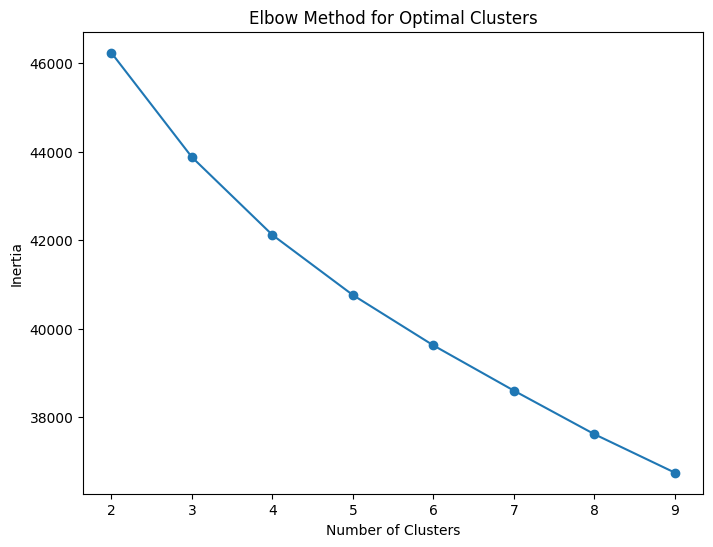

In [8]:
# Determine Optimal Number of Clusters Using Elbow Method
inertia = []
cluster_range = range(2, 10)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

- From the Elbow Method graph appear the "elbow" point appears around 3 or 4 clusters.

In [9]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(features)


In [20]:
pca = PCA(n_components=50, random_state=42)
X_reduced = pca.fit_transform(features.toarray())

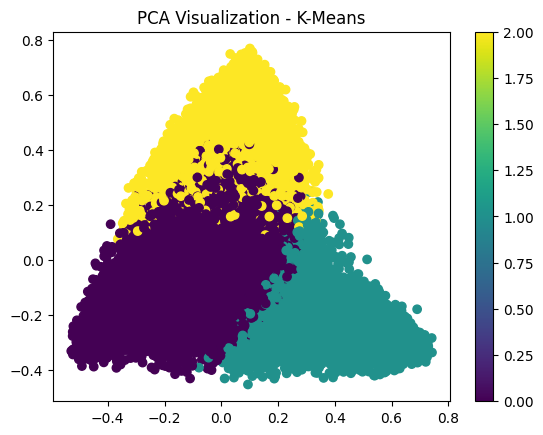

In [11]:
# Visualize K-Means Clusters using PCA
pca = PCA(n_components=2)
pca_features_kmeans = pca.fit_transform(X_reduced)
plt.scatter(pca_features_kmeans[:, 0], pca_features_kmeans[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("PCA Visualization - K-Means")
plt.colorbar()
plt.show()


In [12]:
# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(X_reduced)

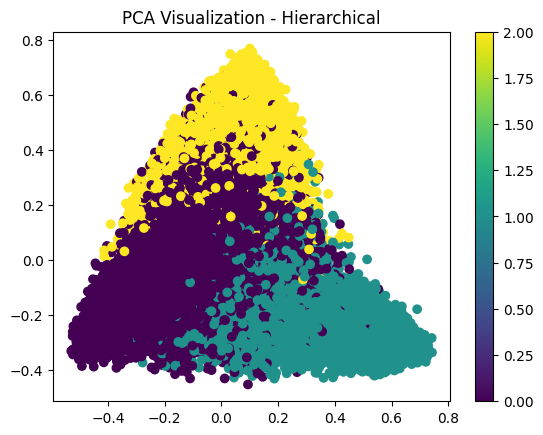

In [13]:
# Visualize Hierarchical Clusters using PCA
pca_features_hc = pca.fit_transform(X_reduced)
plt.scatter(pca_features_hc[:, 0], pca_features_hc[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title("PCA Visualization - Hierarchical")
plt.colorbar()
plt.show()


---
## Evaluation

In [ ]:
# Silhouette Scores
silhouette_kmeans = silhouette_score(features, kmeans_labels)
silhouette_hierarchical = silhouette_score(features, hierarchical_labels)

print(f"Silhouette Score for K-Means: {silhouette_kmeans}")
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_hierarchical}")

Silhouette Score for K-Means: 0.07580645664597098
Silhouette Score for Hierarchical Clustering: 0.06437398808532098
